<a href="https://colab.research.google.com/github/charlieskc/MachineLearning/blob/master/HK_Covid19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hong Kong COVID-19 Analysis (based on age group)

Data downloaded from: http://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv

There are many statistics about COVID-19 in Hong Kong however there are not much statistic based on age group. This notebook aims to provide COVID-10 age group statistics.



In [169]:
#dataset refresh everyday from the website
!rm enhanced_sur_covid_19_eng.csv*
!wget http://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv
#!wget http://www.chp.gov.hk/files/misc/latest_situation_of_reported_cases_covid_19_eng.csv
!ls -lh
!wc -l enhanced_sur_covid_19_eng.csv

--2020-08-10 07:41:46--  http://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv
Resolving www.chp.gov.hk (www.chp.gov.hk)... 104.19.253.59, 104.19.254.59, 2606:4700::6813:fe3b, ...
Connecting to www.chp.gov.hk (www.chp.gov.hk)|104.19.253.59|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv [following]
--2020-08-10 07:41:47--  https://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv
Connecting to www.chp.gov.hk (www.chp.gov.hk)|104.19.253.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘enhanced_sur_covid_19_eng.csv’

enhanced_sur_covid_     [ <=>                ] 370.99K  --.-KB/s    in 0.04s   

2020-08-10 07:41:47 (8.25 MB/s) - ‘enhanced_sur_covid_19_eng.csv’ saved [379898]

total 392K
drwx------ 4 root root 4.0K Aug 10 00:57 drive
-rw-r--r-- 1 root root 371K Aug  9 15:05 enhanced_sur_covid_19_eng.csv
-rw

# Import Packages

In [170]:
'''
Normally you do not need to install pandas, uncomment if pandas is missing
'''
#install pandas 
#!pip install pandas

#load packages
import sys 
import pandas as pd 
import matplotlib 
import numpy as np 
import scipy as sp 
import IPython
import datetime
from IPython.display import display

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8


# Load Data Files

##Age group engineering:
1. Age is categorized into age_bins. Grouping based on WHO https://www.who.int/healthinfo/paper31.pdf?ua=1


In [171]:
df = pd.read_csv('/content/enhanced_sur_covid_19_eng.csv')
df['Report date'] =  pd.to_datetime(df['Report date'], format='%d/%m/%Y')

#df1 = pd.read_csv('/content/latest_situation_of_reported_cases_covid_19_eng.csv')

#categorize age into age group. age group based on WHO https://www.who.int/healthinfo/paper31.pdf?ua=1
ageBin= [0,4,9,14,19,24,29,34,39,44,49,54,59,64,69,74,79,84,89,94,99,104]
df['age_bins'] = pd.cut(x=df['Age'], bins=ageBin)

#preview data
df.sample(5) 

#print(df.dtypes)

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable,age_bins
198,199,2020-03-19,16/03/2020,M,29,NaN,Discharged,HK resident,Possibly local case,Confirmed,"(24, 29]"
2748,2749,2020-07-27,25/07/2020,F,84,NaN,Hospitalised,HK Resident,Epidemiologically linked with local case,Confirmed,"(79, 84]"
1683,1684,2020-07-17,Asymptomatic,M,27,NaN,Discharged,HK Resident,Imported case,Confirmed,"(24, 29]"
3733,3734,2020-08-05,03/08/2020,M,95,NaN,Hospitalised,HK Resident,Epidemiologically linked with local case,Confirmed,"(94, 99]"
1110,1111,2020-06-15,31/05/2020,F,32,NaN,Discharged,HK resident,Imported case,Confirmed,"(29, 34]"


# Data Description

In [172]:
df.describe(include = 'all')


,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable,age_bins
count,4080.000000,4080,4080,4080,4080.000000,0.0,4080,4080,4080,4080,4070
unique,NaN,161,158,2,NaN,NaN,6,5,6,2,21
top,NaN,2020-07-30 00:00:00,Asymptomatic,F,NaN,NaN,Discharged,HK Resident,Epidemiologically linked with local case,Confirmed,"(54, 59]"
freq,NaN,149,859,2052,NaN,NaN,2847,2589,1714,4079,363
first,NaN,2020-01-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-08-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2040.500000,NaN,NaN,NaN,43.984559,NaN,NaN,NaN,NaN,NaN,NaN
std,1177.938878,NaN,NaN,NaN,20.298387,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1020.750000,NaN,NaN,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,NaN


#Statistics

[Text(0, 0.5, 'No. of infections')]

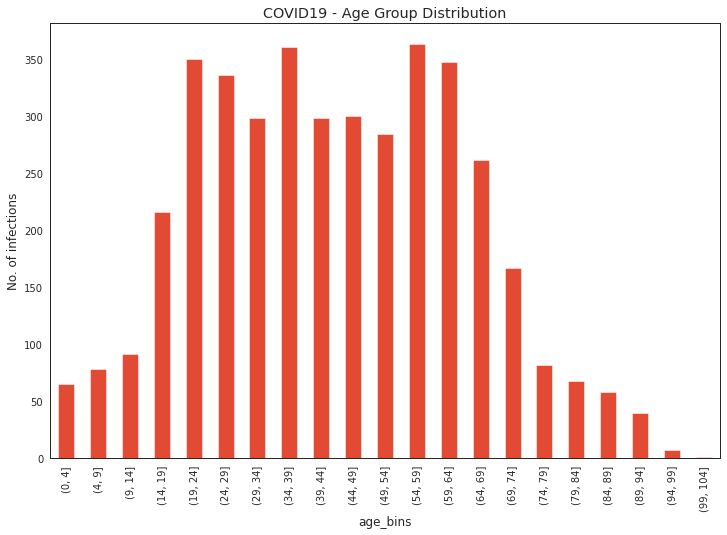

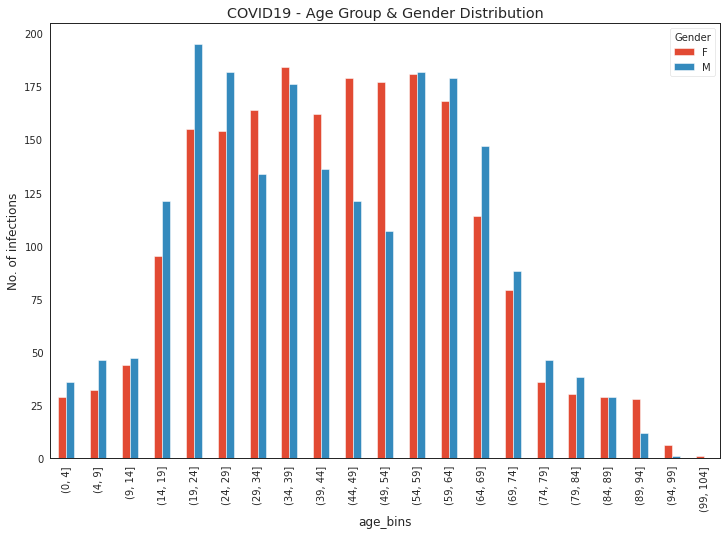

In [173]:
ax1 = df.groupby(['age_bins']).size().plot(title='COVID19 - Age Group Distribution', kind='bar')
ax1.set(ylabel='No. of infections')

#df.groupby(['Hospitalised/Discharged/Deceased']).size().plot(title='COVID19 Gender Distribution', kind='bar')
#df.groupby(['Gender']).size().plot(title='COVID19 Gender Distribution', kind='bar')


ax2 = pd.crosstab(df['age_bins'],df['Gender']).plot(title='COVID19 - Age Group & Gender Distribution', kind='bar')
ax2.set(ylabel='No. of infections')

#pd.crosstab(df['Gender'],df['Hospitalised/Discharged/Deceased']).plot.bar()


[Text(0, 0.5, 'No. of deceased case')]

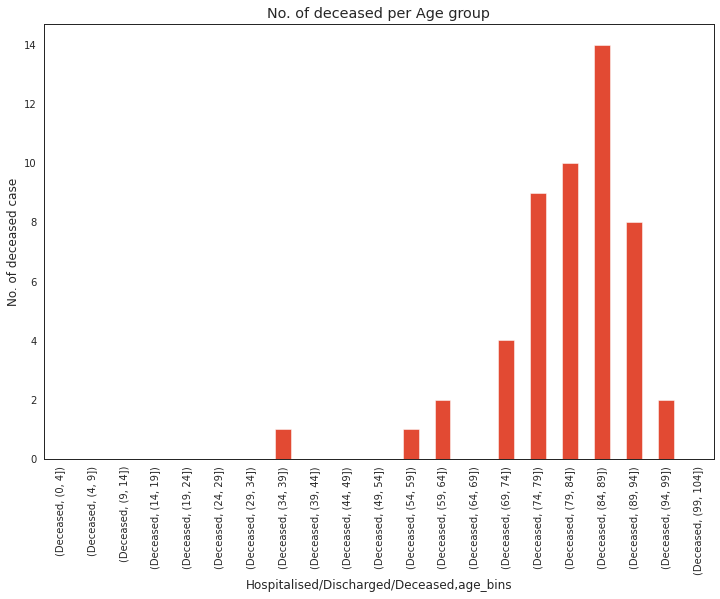

In [174]:
#No. of deceased per Age group
df_deceased = df[df['Hospitalised/Discharged/Deceased']=='Deceased']
ax=df_deceased.groupby(['Hospitalised/Discharged/Deceased','age_bins']).size().plot(title='No. of deceased per age group', kind='bar')
ax.set(ylabel='No. of deceased case')


[Text(0, 0.5, 'Mortality Rate')]

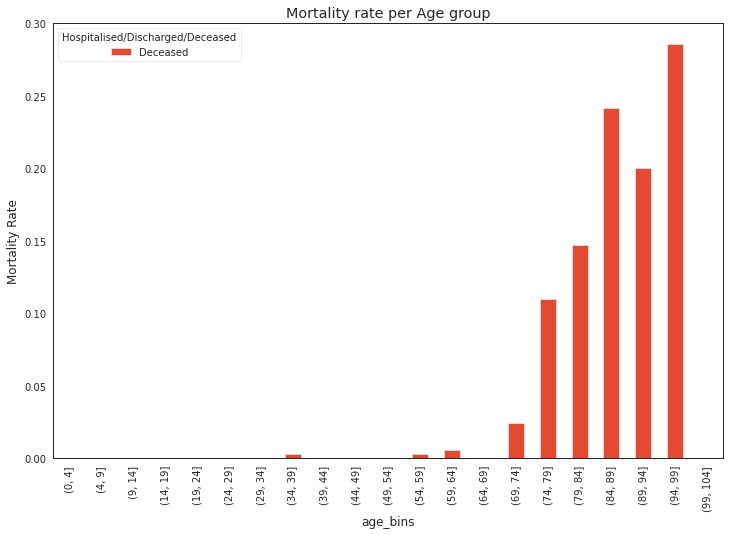

In [175]:
#Mortality Rate
df_ratio = pd.crosstab(df['age_bins'],df['Hospitalised/Discharged/Deceased']).apply(lambda r: r/r.sum(), axis=1)
ax=df_ratio[['Deceased']].plot(title='Mortality rate per age group', kind='bar')
ax.set(ylabel='Mortality Rate')


In [176]:
#Ratio Breakdown
display(df_ratio)



Hospitalised/Discharged/Deceased,Deceased,Discharged,Hospitalised,No admission,Pending admission,To be provided
age_bins,,,,,,
"(0, 4]",0.000000,0.676923,0.307692,0.000000,0.015385,0.000000
"(4, 9]",0.000000,0.730769,0.269231,0.000000,0.000000,0.000000
"(9, 14]",0.000000,0.758242,0.241758,0.000000,0.000000,0.000000
"(14, 19]",0.000000,0.893519,0.087963,0.004630,0.009259,0.004630
"(19, 24]",0.000000,0.700000,0.242857,0.005714,0.017143,0.034286
"(24, 29]",0.000000,0.708333,0.223214,0.020833,0.014881,0.032738
"(29, 34]",0.000000,0.765101,0.174497,0.023490,0.020134,0.016779
"(34, 39]",0.002778,0.758333,0.211111,0.008333,0.002778,0.016667
"(39, 44]",0.000000,0.751678,0.201342,0.000000,0.020134,0.026846


In [177]:
#df_7days = df[df['Report date'] > datetime.datetime.now() - pd.to_timedelta("8day")
#ax = df_7days.groupby(['Report date']).size().plot(title='COVID19 Trend', kind='bar')
#ax.set(ylabel='No. of infections')